In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import numpy as np
import collections
from plotnine import *
from mizani.formatters import percent_format
from matplotlib.colors import to_hex as hex_color_code

In [2]:
cmap_reds = plt.cm.get_cmap('Reds')
sns.set_palette('Reds')

In [3]:
data = pd.read_csv('cleaned_data.csv', index_col=0)
data.head()

,title,year,bt_score,dubious,imdbid,tmdbId,genres,popularity,production_companies,production_countries,...,revenue,vote_average,vote_count,cast,crew,budget,cast_gender,crew_gender,cast_female_representation,crew_female_representation
0,Cinderella,1899,3,0,230,114108,"['Drama', 'Family', 'Fantasy', 'Romance']",3.762,"['Star-Film', 'Georges Méliès']",['France'],...,0.0,6.1,79.0,"[{'adult': False, 'gender': 2, 'id': 11523, 'k...","[{'adult': False, 'gender': 2, 'id': 11523, 'k...",0.0,"[2, 0, 1, 0, 1, 0]","[2, 2, 2, 2]",33.333333,0.000000
1,Gretchen the Greenhorn,1916,3,0,6745,126925,[],1.942,[],[],...,0.0,6.1,7.0,"[{'adult': False, 'gender': 1, 'id': 30779, 'k...","[{'adult': False, 'gender': 2, 'id': 42060, 'k...",0.0,"[1, 2, 2, 2]","[2, 2, 2]",25.000000,0.000000
2,Snow White,1916,3,0,7361,174598,"['Fantasy', 'Drama']",0.817,[],[],...,0.0,5.7,9.0,"[{'adult': False, 'gender': 0, 'id': 1658947, ...","[{'adult': False, 'gender': 2, 'id': 28968, 'k...",0.0,"[0, 1, 2, 2, 0]",[2],20.000000,0.000000
3,The Poor Little Rich Girl,1917,3,0,8443,95866,"['Romance', 'Comedy', 'Drama', 'Fantasy']",2.023,['Artcraft Pictures Corporation'],['United States of America'],...,0.0,5.8,23.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 2, 'id': 13335, 'k...",0.0,"[1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1]","[2, 2, 1, 1, 2, 2, 0]",38.461538,28.571429
4,Stella Maris,1918,3,0,9652,70753,['Drama'],1.310,['Mary Pickford Company'],['United States of America'],...,2400000.0,6.9,19.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 1, 'id': 34741, 'k...",0.0,"[1, 1, 2, 2, 1, 0, 0, 2]","[1, 2, 2, 0, 2, 2]",37.500000,16.666667


## **Gráficos simples**

### **Filmes por nota no Teste de Bechdel**
**Métodos utilizados**
- `collections.Counter()`: conta os valores totais das notas de 0 a 3.
- `DataFrame.from_dict(data, orient='index')`: transforma um dicionário em DataFrame. `orient='index'` faz com que as keys do dicionário sejam usadas como index.

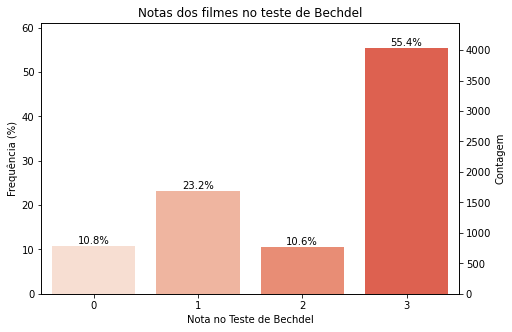

In [24]:
# TOTAL DE FILMES POR NOTA
# score_plot = sns.barplot(x='score', y='total', data=score_df)
fig, ax1 = plt.subplots(figsize=(7, 4.5), constrained_layout=True)

score_plot = sns.barplot(x='index', y='bt_score', data=data.bt_score.value_counts().reset_index(), ax=ax1)
# score_plot.bar_label(score_plot.containers[0])
score_plot.set(title='Notas dos filmes no teste de Bechdel')

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
score_plot.set_xticks(xticks_location, np.arange(data['bt_score'].min(), data['bt_score'].max()+1, 1))

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['bt_score'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

score_plot.set(xlabel='Nota no Teste de Bechdel')
plt.show()

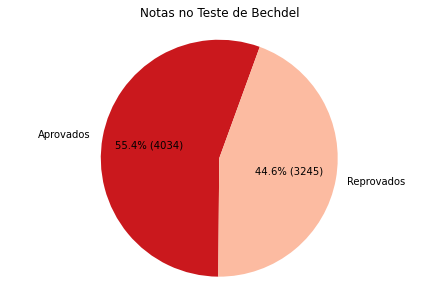

In [74]:
# PORCENTAGEM DOS FILMES
# score_df = df com a quantidade de filmes por nota
fig, axs = plt.subplots(constrained_layout=True)

aprovacao_teste_bechdel = pd.Series([data['bt_score'][data['bt_score'] == 3].value_counts().sum(), data['bt_score'][data['bt_score'] != 3].value_counts().sum()], index=['Aprovados', 'Reprovados'])

graph = axs.pie(aprovacao_teste_bechdel.values, labels=aprovacao_teste_bechdel.index, startangle=70, colors=[cmap_reds(0.75), cmap_reds(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*aprovacao_teste_bechdel.values.sum():n})')
axs.axis('equal')
axs.set_title('Notas no Teste de Bechdel', pad=10)

plt.show()

In [64]:
# budget_df = data.copy()
# budget_df['Orçamento'] = pd.NA

# for index, row in budget_df.iterrows():
#     orçamento = 0
#     if row['budget'] <= 1*(50*(10**6)):
#         orçamento = 1*50
#     elif row['budget'] <= 2*(50*(10**6)):
#         orçamento = 2*50
#     elif row['budget'] <= 3*(50*(10**6)):
#         orçamento = 3*50
#     elif row['budget'] <= 4*(50*(10**6)):
#         orçamento = 4*50
#     elif row['budget'] <= 5*(50*(10**6)):
#         orçamento = 5*50
#     elif row['budget'] <= 6*(50*(10**6)):
#         orçamento = 6*50
#     elif row['budget'] <= 7*(50*(10**6)):
#         orçamento = 7*50
#     elif row['budget'] <= 8*(50*(10**6)):
#         orçamento = 8*50
#     budget_df.loc[index, 'Orçamento'] = orçamento
# budget_df['Orçamento'] = budget_df['Orçamento'].astype('int64')

# fig, axs = plt.subplots(figsize=(8, 4.5), constrained_layout=True)
# sns.countplot(ax=axs, x='Orçamento', hue='bt_score', data=budget_df)
# plt.legend(loc='upper right')
# plt.title("Orçamento x Teste Bechdel")
# plt.xlabel("Orçamento (em milhões de dólares)")
# plt.ylabel("Quantidade de filmes")
# plt.show()

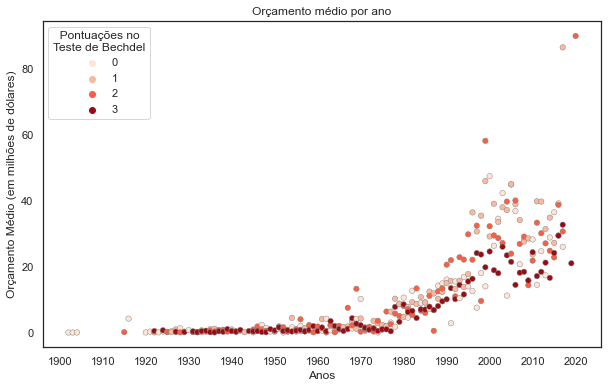

In [116]:
budget_year_mean = data.groupby(['year', 'bt_score'])['budget'].mean().to_frame().reset_index()
budget_year_mean1 = budget_year_mean[budget_year_mean['budget'] > 0]
budget_year_mean2 = budget_year_mean1[budget_year_mean1['year'] >= 1902]
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y = 'budget', x = 'year', hue = 'bt_score', data=budget_year_mean2, s = 30, edgecolor=".5", palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.53), cmap_reds(0.9)])
plt.legend(title = "  Pontuações no\nTeste de Bechdel")
ax.set_xlabel("Anos") 
ax.set_ylabel("Orçamento Médio (em milhões de dólares)") 
ax.set_title("Orçamento médio por ano") 
ax.set_xticks(np.arange(1900, 2020+10, 10))

def numfmt(x, pos):
    s = int(x/10**6)
    return s
yfmt = tkr.FuncFormatter(numfmt)
ax.yaxis.set_major_formatter(yfmt)

# plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [66]:
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 12}) 
# g = sns.relplot(data = budget_year_mean2, x = "year",  y = "budget", col = "bt_score", hue = "bt_score") 
# g.fig.suptitle("Orçamento médio por ano", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Orçamento Médio ($)") 
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

In [67]:
# budget_interval_mean = data.groupby(['year', 'bt_score'])['budget'].mean().to_frame().reset_index()
# budget_interval_mean1 = budget_interval_mean[budget_interval_mean['budget'] > 0]
# budget_interval_mean2 = budget_interval_mean1[budget_interval_mean1['year'] >= 1902]

# for index, year in budget_interval_mean2['year'].iteritems():
#     interval_start = int(year - year % 10 + 1)
#     interval_end = int(interval_start + 9)
#     budget_interval_mean2.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
    
# fig, ax = plt.subplots(figsize = (14 , 7))
# sns.set_theme(style="ticks")
# sns.set_style("white")
# sns.scatterplot(y = 'budget', x = 'year_interval', hue = 'bt_score', data=budget_interval_mean2, s = 30, edgecolor=".5")
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Orçamento Médio ($)", size = 14) 
# ax.set_title("Orçamento médio por década", size = 24) 
# ax.set_yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000])
# plt.ticklabel_format(style='plain', axis='y')

In [68]:
# revenue_df = data.loc[data['revenue'] > 0].copy()

# revenue_df['Bilheteria'] = pd.NA

# for index, row in revenue_df.iterrows():
#     bilheteria = 0
#     if row['revenue'] <= 500000:
#         bilheteria += 1
#     if row['revenue'] <= 1000000 and row['revenue'] > 500000:
#         bilheteria += 2
#     if row['revenue'] <= 5000000 and row['revenue'] > 1000000:
#         bilheteria += 3
#     if row['revenue'] <= 10000000 and row['revenue'] > 5000000:
#         bilheteria += 4
#     if row['revenue'] <= 15000000 and row['revenue'] > 10000000:
#         bilheteria += 5
#     if row['revenue'] <= 30000000 and row['revenue'] > 15000000:
#         bilheteria += 6
#     if row['revenue'] <= 60000000 and row['revenue'] > 30000000:
#         bilheteria += 7
#     if row['revenue'] > 60000000:
#         bilheteria += 8
#     revenue_df.loc[index, 'Bilheteria'] = bilheteria

# sns.countplot(x ='Bilheteria', hue = 'bt_score', data = revenue_df, palette='Reds')
# plt.title("Bilheteria x Teste Bechdel", fontsize=15)
# plt.xlabel("Bilheteria ($)")
# plt.ylabel("Quantidade de filmes")
# plt.show()

In [69]:
# revenue_year_mean = data.groupby(['year', 'bt_score'])['revenue'].mean().to_frame().reset_index()
# revenue_year_mean1 = revenue_year_mean[revenue_year_mean['revenue'] > 0]
# revenue_year_mean2 = revenue_year_mean1[revenue_year_mean1['year'] >= 1902]
# fig, ax = plt.subplots(figsize = (14 , 7))
# sns.set_theme(style="ticks")
# sns.set_style("white")
# sns.scatterplot(y = 'revenue', x = 'year', hue = 'bt_score', data=revenue_year_mean2, s = 30, edgecolor=".5")
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Bilheteria Média ($)", size = 14) 
# ax.set_title("Bilheteria média por ano", size = 24) 
# ax.set_xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

In [70]:
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 12}) 
# g = sns.relplot(data = revenue_year_mean2, x = "year",  y = "revenue", col = "bt_score", hue = "bt_score") 
# g.fig.suptitle("Bilheteria média por ano", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Bilheteria média ($)") 
# plt.ticklabel_format(style='plain', axis='y') 
# plt.show()

In [71]:
# revenue_interval_mean = data.groupby(['year', 'bt_score'])['revenue'].mean().to_frame().reset_index()
# revenue_interval_mean1 = revenue_interval_mean[revenue_interval_mean['revenue'] > 0]
# revenue_interval_mean2 = revenue_interval_mean1[revenue_interval_mean1['year'] >= 1902]

# for index, year in revenue_interval_mean2['year'].iteritems():
#     interval_start = int(year - year % 10 + 1)
#     interval_end = int(interval_start + 9)
#     revenue_interval_mean2.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
    
# fig, ax = plt.subplots(figsize = (16 , 8))
# sns.set_theme(style="ticks")
# sns.set_style("white")
# sns.scatterplot(y = 'revenue', x = 'year_interval', hue = 'bt_score', data=revenue_interval_mean2, s = 30, edgecolor=".5")
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Bilheteria Média ($)", size = 14) 
# ax.set_title("Bilheteria média por década", size = 24) 
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

In [129]:
# bechdel_year_mean = data.groupby(['year'])['bt_score'].mean().to_frame().reset_index()
# for index, year in bechdel_year_mean['year'].iteritems():
#     if (year % 10) == 0:
#         interval_start = int(year - year%10 - 9)
#     else:
#         interval_start = int(year - year%10 + 1)
#     interval_end = int(interval_start + 9)
#     bechdel_year_mean.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)
# fig, ax = plt.subplots(figsize = (16 , 8))
# sns.set_style("white")
# sns.scatterplot(data=bechdel_year_mean, x="year_interval", y="bt_score", ci=None, color='Red')
# plt.legend(labels = ['Pontuação no Teste Bechdel'])
# ax.set_xlabel("Anos") 
# ax.set_ylabel("Pontuação Média") 
# ax.set_title("Pontuação média por década")
# plt.show()

In [72]:
# import matplotlib as mpl
    
# sns.set_theme(style="ticks")
# f, ax = plt.subplots(figsize=(16, 8))
# sns.despine(f)
# sns.histplot(data, x="year", hue="bt_score", multiple="stack", edgecolor=".3", linewidth=.5)
# plt.legend(labels = ["Passaram no Teste", "Elas conversam sobre homens", "Elas não conversam entre si", "Não existem 2 personagens femininas"], 
#            title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Quantidade de filmes", size = 14) 
# ax.set_title("Pontuação por ano", size = 24) 
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
# ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
# ax.set_xlim(1890, 2020)
# ax.set_ylim(0, 1000)
# plt.show()

In [73]:
# sns.set_theme(style="darkgrid")
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 10}) 
# g = sns.displot(data, x="year", col="bt_score", binwidth=3, height=3, facet_kws=dict(margin_titles=True), color='Red')
# g.set(xticks=(1900, 1940, 1980, 2020), yticks=(0, 100, 200, 300, 400, 500, 600))
# g.fig.suptitle("Notas Bechdel", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Quantidade de filmes")
# plt.show()

In [74]:
# imdb_bechdel = data.groupby(['year', 'bt_score'])['vote_average'].mean().to_frame().reset_index()
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15}) 
# g = sns.relplot(data = imdb_bechdel, x = "year",  y = "vote_average", col = "bt_score", hue = "bt_score") 
# g.fig.suptitle("IMDB x Bechdel", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Nota IMDB") 
# g.set(ylim=(0, 10))
# g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plt.show()

In [75]:
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15}) 
# g = sns.relplot(data = data, x = "year",  y = "vote_average", col = "bt_score", hue = "bt_score") 
# g.fig.suptitle("IMDB x Bechdel", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Nota IMDB") 
# g.set(ylim=(0, 10))
# g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plt.show()

In [76]:
# fig, ax = plt.subplots(figsize = (14 , 7))
# sns.set_theme(style="ticks")
# sns.set_style("white")
# sns.scatterplot(y = "vote_average", x = 'year', hue = 'bt_score', data=imdb_bechdel, s = 30, edgecolor=".5")
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Nota IMDB", size = 14) 
# ax.set_title("IMDB x Bechdel", size = 24) 
# ax.set_xticks([1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
# ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

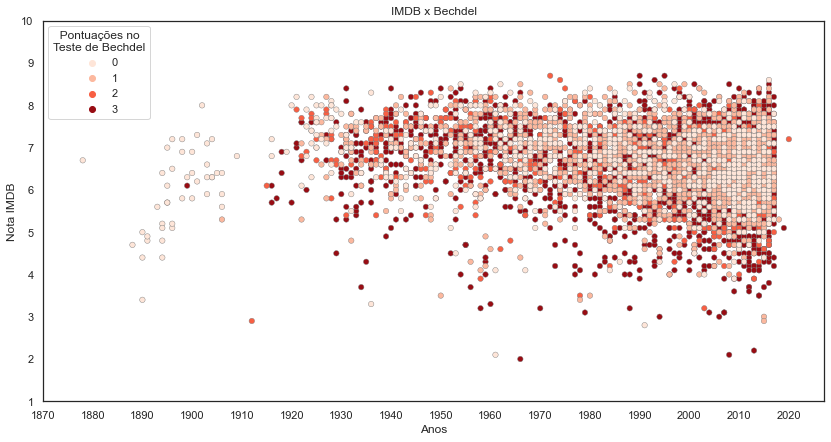

In [63]:
fig, ax = plt.subplots(figsize = (14 , 7))
sns.set_theme(style="ticks")
sns.set_style("white")
sns.scatterplot(y = "vote_average", x = 'year', hue = 'bt_score', data=data, s = 30, edgecolor=".5", palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.53), cmap_reds(0.9)])
plt.legend(title = "  Pontuações no\nTeste de Bechdel")
ax.set_xlabel("Anos")
ax.set_ylabel("Nota IMDB")
ax.set_title("IMDB x Bechdel")
ax.set_xticks(np.arange(1870, 2020+10, 10))
ax.set_yticks(np.arange(1, 10+1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [77]:
# sns.set( rc = {'figure.figsize': (60, 60), 'axes.labelsize': 15})  
# g = sns.lmplot(x = 'year', y = "vote_average", hue = 'bt_score', col = 'bt_score', data = imdb_bechdel, ci = None, palette='Reds')
# g.fig.suptitle("IMDB x Bechdel", fontsize = 20, fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Nota IMDB") 
# g.set(ylim=(0, 10))
# g.set(xticks=(1880, 1910, 1940, 1970, 2000, 2020), yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plt.show()

In [78]:
# for index, year in imdb_bechdel['year'].iteritems():
#     interval_start = int(year - year % 10 + 1)
#     interval_end = int(interval_start + 9)
#     imdb_bechdel.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)

# fig, ax = plt.subplots(figsize = (16 , 8))
# sns.set_theme(style="ticks")
# sns.set_style("white")
# sns.scatterplot(y = "vote_average", x = 'year_interval', hue = 'bt_score', data=imdb_bechdel, s = 30, edgecolor=".5")
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# ax.set_xlabel("Anos", size = 14) 
# ax.set_ylabel("Nota IMDB", size = 14) 
# ax.set_title("IMDB x Bechdel", size = 24) 
# ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

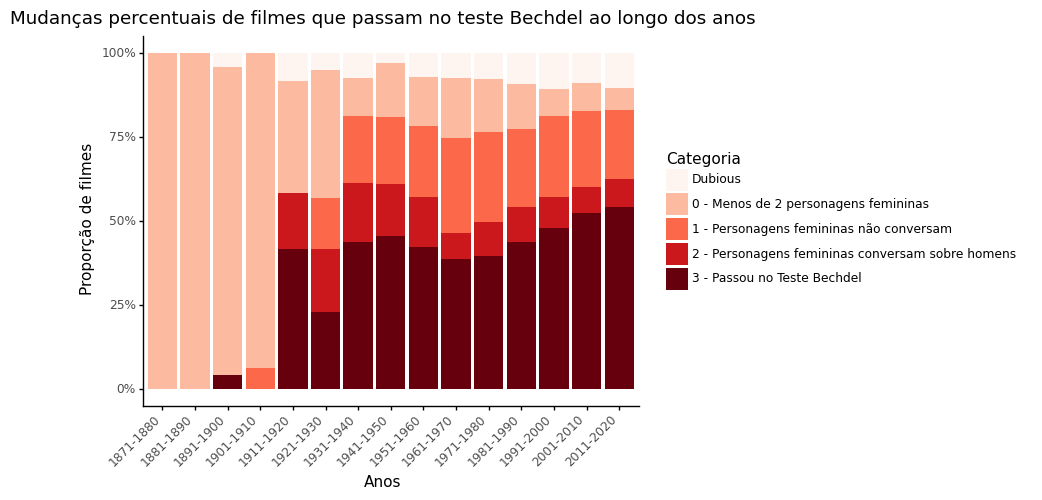

<ggplot: (91826118572)>

In [45]:
data2_df = data.copy()
data2_df = data2_df[data2_df['year'] < 2021]

for index, bt_score in data2_df['bt_score'].iteritems():
    if data2_df.at[index, 'dubious'] == 1:
        data2_df.at[index, 'Categoria'] = 'Dubious'
    elif bt_score == 0:
        data2_df.at[index, 'Categoria'] = '0 - Menos de 2 personagens femininas'
    elif bt_score == 1:
        data2_df.at[index, 'Categoria'] = '1 - Personagens femininas não conversam'
    elif bt_score == 2:
        data2_df.at[index, 'Categoria'] = '2 - Personagens femininas conversam sobre homens'
    else:
        data2_df.at[index, 'Categoria'] = '3 - Passou no Teste Bechdel'
            
bechdel_df_ordered = data2_df.copy()
bechdel_df_ordered['Categoria'] = pd.Categorical(bechdel_df_ordered['Categoria'], categories=[
    'Dubious',
    '0 - Menos de 2 personagens femininas', 
    '1 - Personagens femininas não conversam',
    '2 - Personagens femininas conversam sobre homens',
    '3 - Passou no Teste Bechdel'
], ordered=True)

for index, year in bechdel_df_ordered['year'].iteritems():
    if (year % 10) == 0:
        interval_start = int(year - year%10 - 9)
    else:
        interval_start = int(year - year%10 + 1)
    interval_end = int(interval_start + 9)
    bechdel_df_ordered.at[index, 'year_interval'] = str(interval_start) + '-' + str(interval_end)

(ggplot(bechdel_df_ordered, 
        aes(fill = 'Categoria', x = 'year_interval')) + 
    geom_bar(position = "fill") + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values = [hex_color_code(cmap_reds(0)), hex_color_code(cmap_reds(0.25)), hex_color_code(cmap_reds(0.5)), hex_color_code(cmap_reds(0.75)), hex_color_code(cmap_reds(1.0))]) +
    # geom_text(angle=45) + 
    labs(
        title = 'Mudanças percentuais de filmes que passam no teste Bechdel ao longo dos anos', 
        subtitle = 'Gráfico de barras de porcentagem empilhada',
        x = 'Anos', 
        y = 'Proporção de filmes'
    ) + 
    theme_classic() + 
    theme(axis_text_x  = element_text(angle = 45, hjust = 1))
)

## **Novos gráficos**

In [80]:
# budget_df = data.loc[data['budget'] > 0].copy()

# budget_df['Orçamento'] = pd.NA

# for index, row in budget_df.iterrows():
#     orçamento = 0
#     if row['budget'] <= 500000:
#         orçamento += 1
#     if row['budget'] <= 1000000 and row['budget'] > 500000:
#         orçamento += 2
#     if row['budget'] <= 5000000 and row['budget'] > 1000000:
#         orçamento += 3
#     if row['budget'] <= 10000000 and row['budget'] > 5000000:
#         orçamento += 4
#     if row['budget'] <= 15000000 and row['budget'] > 10000000:
#         orçamento += 5
#     if row['budget'] <= 30000000 and row['budget'] > 15000000:
#         orçamento += 6
#     if row['budget'] <= 60000000 and row['budget'] > 30000000:
#         orçamento += 7
#     if row['budget'] > 60000000:
#         orçamento += 8
#     budget_df.loc[index, 'Orçamento'] = orçamento

# fig = plt.figure(figsize=(14,7))
# plot = sns.countplot(x ='Orçamento', hue = 'bt_score', data = budget_df)
# plt.title("Orçamento x Teste Bechdel", fontsize=15)
# plt.xlabel("Orçamento ($)", fontsize=12)
# plt.ylabel("Quantidade de filmes", fontsize=12)
# for i in range (4):
#     plot.bar_label(plot.containers[i])
# # Filmes com orçamento 0: 3.058
# plt.legend(title = "Teste Bechdel", fontsize = '10', title_fontsize = "10")
# plot.set(xticklabels=[])
# plt.text(0,-12, "até $500.000", ha='center')
# plt.text(1,-12, "até $1.000.000", ha='center')
# plt.text(2,-12, "até $5.000.000", ha='center')
# plt.text(3,-12, "até $10.000.000", ha='center')
# plt.text(4,-12, "até $15.000.000", ha='center')
# plt.text(5,-12, "até $30.000.000", ha='center')
# plt.text(6,-12, "até $60.000.000", ha='center')
# plt.text(7,-12, "maior $60.000.000", ha='center')
# plt.show()

In [81]:
# revenue_df = data.loc[data['revenue'] > 0].copy()

# revenue_df['Bilheteria'] = pd.NA

# for index, row in revenue_df.iterrows():
#     bilheteria = 0
#     if row['revenue'] <= 500000:
#         bilheteria += 1
#     if row['revenue'] <= 1000000 and row['revenue'] > 500000:
#         bilheteria += 2
#     if row['revenue'] <= 5000000 and row['revenue'] > 1000000:
#         bilheteria += 3
#     if row['revenue'] <= 10000000 and row['revenue'] > 5000000:
#         bilheteria += 4
#     if row['revenue'] <= 15000000 and row['revenue'] > 10000000:
#         bilheteria += 5
#     if row['revenue'] <= 30000000 and row['revenue'] > 15000000:
#         bilheteria += 6
#     if row['revenue'] <= 60000000 and row['revenue'] > 30000000:
#         bilheteria += 7
#     if row['revenue'] > 60000000:
#         bilheteria += 8
#     revenue_df.loc[index, 'Bilheteria'] = bilheteria

# fig = plt.figure(figsize=(14,7))
# plot = sns.countplot(x ='Bilheteria', hue = 'bt_score', data = revenue_df)
# plt.title("Bilheteria x Teste Bechdel", fontsize=15)
# plt.xlabel("Bilheteria ($)", fontsize=12)
# plt.ylabel("Quantidade de filmes", fontsize=12)
# for i in range (4):
#     plot.bar_label(plot.containers[i])
# # Filmes com bilheteria 0: 2924
# plt.legend(title = "Teste Bechdel", fontsize = '12', title_fontsize = "12")
# plot.set(xticklabels=[])
# plt.text(0,-25, "até $500.000", ha='center')
# plt.text(1,-25, "até $1.000.000", ha='center')
# plt.text(2,-25, "até $5.000.000", ha='center')
# plt.text(3,-25, "até $10.000.000", ha='center')
# plt.text(4,-25, "até $15.000.000", ha='center')
# plt.text(5,-25, "até $30.000.000", ha='center')
# plt.text(6,-25, "até $60.000.000", ha='center')
# plt.text(7,-25, "maior $60.000.000", ha='center')
# plt.show()

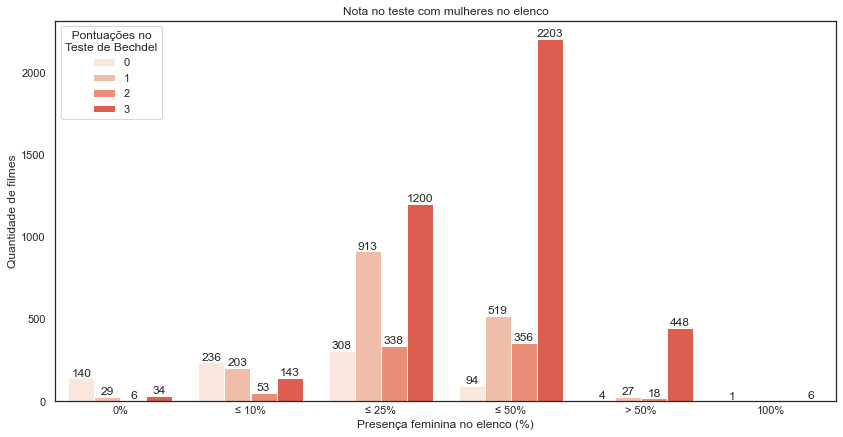

In [151]:
cast_df = pd.DataFrame(data)

cast_df['Cast'] = pd.NA

for index, row in cast_df.iterrows():
    Cast = 0
    if row['cast_female_representation'] == 0:
        Cast == 0 
    if row['cast_female_representation'] != 0 and row['cast_female_representation'] <= 10:
        Cast += 1
    if row['cast_female_representation'] > 10 and row['cast_female_representation'] <= 25:
        Cast += 2
    if row['cast_female_representation'] > 25 and row['cast_female_representation'] <= 50:
        Cast += 3
    if row['cast_female_representation'] > 50 and row['cast_female_representation'] != 100:
        Cast += 4
    if row['cast_female_representation'] == 100:
        Cast += 5
    cast_df.loc[index, 'Cast'] = Cast

fig = plt.figure(figsize=(14, 7))
plot = sns.countplot(x ='Cast', hue = 'bt_score', data = cast_df, palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.42), cmap_reds(0.58), cmap_reds(0.74), cmap_reds(0.9)])
plt.title("Nota no teste com mulheres no elenco")
plt.xlabel("Presença feminina no elenco (%)")
plt.ylabel("Quantidade de filmes")
for i in range(4):
    plot.bar_label(plot.containers[i])
plt.legend(title = "  Pontuações no\nTeste de Bechdel")
plot.set_xticklabels(['0%', '≤ 10%', '≤ 25%', '≤ 50%', '> 50%', '100%'], ha='center', va='center')
plt.show()

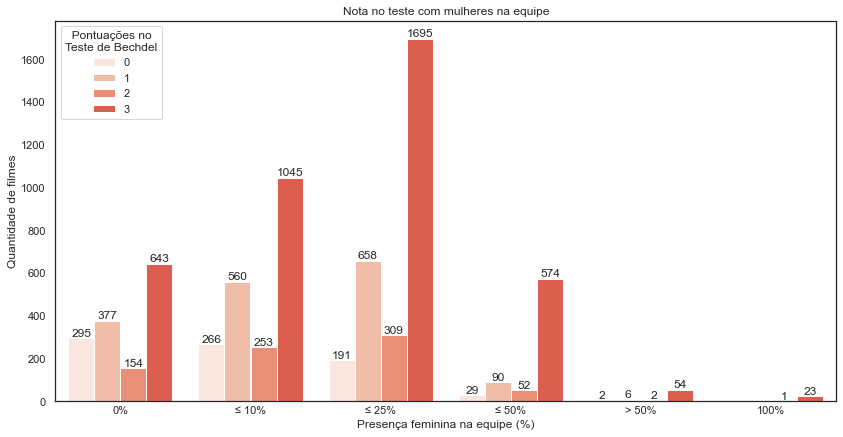

In [150]:
crew_df = pd.DataFrame(data)

crew_df['Crew'] = pd.NA

for index, row in crew_df.iterrows():
    crew = 0
    if row['crew_female_representation'] == 0:
        crew == 0 
    if row['crew_female_representation'] != 0 and row['crew_female_representation'] <= 10:
        crew += 1
    if row['crew_female_representation'] > 10 and row['crew_female_representation'] <= 25:
        crew += 2
    if row['crew_female_representation'] > 25 and row['crew_female_representation'] <= 50:
        crew += 3
    if row['crew_female_representation'] > 50 and row['crew_female_representation'] != 100:
        crew += 4
    if row['crew_female_representation'] == 100:
        crew += 5
    crew_df.loc[index, 'Crew'] = crew

fig = plt.figure(figsize=(14, 7))
plot = sns.countplot(x ='Crew', hue = 'bt_score', data = crew_df, palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.42), cmap_reds(0.58), cmap_reds(0.74), cmap_reds(0.9)])
plt.title("Nota no teste com mulheres na equipe")
plt.xlabel("Presença feminina na equipe (%)")
plt.ylabel("Quantidade de filmes")
for i in range(4):
    plot.bar_label(plot.containers[i])
plt.legend(title = "  Pontuações no\nTeste de Bechdel")
plot.set_xticklabels(['0%', '≤ 10%', '≤ 25%', '≤ 50%', '> 50%', '100%'], ha='center', va='center')
plt.show()

In [82]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = crew_df, x = "year",  y = "vote_average", col = "Crew", hue = "Crew", palette="bright") 
# g.fig.suptitle("Nota IMDB com equipe feminina", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Nota IMDB") 
# g.set(ylim=(0, 10))
# g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plt.show()

In [83]:
# fig = plt.figure(figsize=(8, 4))
# plot = sns.barplot(x = 'Crew', y = 'vote_average', data = crew_df, ci=None)
# plt.title('Notas IMDB com equipe feminina', fontsize='13')
# plt.xlabel("Equipe feminina (%)", fontsize='11')
# plt.ylabel("Nota no IMDB", fontsize='11')
# plt.text(0, 5, "1469", ha='center')
# plt.text(1, 5, "2124", ha='center')
# plt.text(2, 5, "2853", ha='center')
# plt.text(3, 5, "745", ha='center')
# plt.text(4, 5, "64", ha='center')
# plt.text(5, 4, "24", ha='center')
# plot.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plot.set(xticklabels=[])
# plt.text(0,-0.4, "0%", ha='center')
# plt.text(1,-0.4, "até 10%", ha='center')
# plt.text(2,-0.4, "até 25%", ha='center')
# plt.text(3,-0.4, "até 50%", ha='center')
# plt.text(4,-0.4, "mais 50%", ha='center')
# plt.text(5,-0.4, "100%", ha='center')
# plt.show()

In [84]:
# fig = plt.figure(figsize=(8, 4))
# plot = sns.barplot(x = 'Cast', y = 'vote_average', data = cast_df, ci=None)
# plt.title('Notas IMDB com elenco feminino', fontsize='13')
# plt.xlabel("Elenco feminino (%)", fontsize='11')
# plt.ylabel("Nota no IMDB", fontsize='11')
# plt.text(0, 5, "209", ha='center')
# plt.text(1, 5, "635", ha='center')
# plt.text(2, 5, "2759", ha='center')
# plt.text(3, 5, "3172", ha='center')
# plt.text(4, 5, "497", ha='center')
# plt.text(5, 5, "7", ha='center')
# plot.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plot.set(xticklabels=[])
# plt.text(0,-0.4, "0%", ha='center')
# plt.text(1,-0.4, "até 10%", ha='center')
# plt.text(2,-0.4, "até 25%", ha='center')
# plt.text(3,-0.4, "até 50%", ha='center')
# plt.text(4,-0.4, "mais 50%", ha='center')
# plt.text(5,-0.4, "100%", ha='center')
# plt.show()

In [85]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = cast_df, x = "year",  y = "vote_average", col = "Cast", hue = "Cast", palette="bright") 
# g.fig.suptitle("Nota IMDB com elenco feminino", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Nota IMDB") 
# g.set(ylim=(0, 10))
# g.set(yticks=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
# plt.show()

In [86]:
# fig = plt.figure(figsize=(10,5))
# plot = sns.scatterplot(x ='year', y = 'Crew', data = crew_df, color='red')
# plt.title("Equipe feminina ao longo dos anos", fontsize=15)
# plt.ylabel("Presença feminina na equipe (%)", fontsize=11)
# plt.xlabel("Anos", fontsize=11)
# plot.set(yticklabels=[])
# plt.text(1872,0, "0%", ha='center')
# plt.text(1872,1, "<=10%", ha='center')
# plt.text(1872,2, "<=25%", ha='center')
# plt.text(1872,3, "<=50%", ha='center')
# plt.text(1872,4, ">50%", ha='center')
# plt.text(1872,5, "100%", ha='center')
# plt.show()

In [87]:
# fig = plt.figure(figsize=(10,5))
# plot = sns.scatterplot(x ='year', y = 'Cast', data = cast_df, color='red')
# plt.title("Elenco feminino ao longo dos anos", fontsize=15)
# plt.ylabel("Presença feminina no elenco (%)", fontsize=11)
# plt.xlabel("Anos", fontsize=11)
# plot.set(yticklabels=[])
# plt.text(1872,0, "0%", ha='center')
# plt.text(1872,1, "<=10%", ha='center')
# plt.text(1872,2, "<=25%", ha='center')
# plt.text(1872,3, "<=50%", ha='center')
# plt.text(1872,4, ">50%", ha='center')
# plt.text(1872,5, "100%", ha='center')
# plt.show()

In [120]:
crew_new_df = crew_df.loc[data['budget' and 'revenue'] > 0].copy()

for index, row in crew_new_df.iterrows():
    orçamento = 0
    if row['budget'] <= 500000:
        orçamento += 1
    if row['budget'] <= 1000000 and row['budget'] > 500000:
        orçamento += 2
    if row['budget'] <= 5000000 and row['budget'] > 1000000:
        orçamento += 3
    if row['budget'] <= 10000000 and row['budget'] > 5000000:
        orçamento += 4
    if row['budget'] <= 15000000 and row['budget'] > 10000000:
        orçamento += 5
    if row['budget'] <= 30000000 and row['budget'] > 15000000:
        orçamento += 6
    if row['budget'] <= 60000000 and row['budget'] > 30000000:
        orçamento += 7
    if row['budget'] > 60000000:
        orçamento += 8
    crew_new_df.loc[index, 'Orçamento'] = orçamento
    
crew_new_df['Bilheteria'] = pd.NA

for index, row in crew_new_df.iterrows():
    bilheteria = 0
    if row['revenue'] <= 500000:
        bilheteria += 1
    if row['revenue'] <= 1000000 and row['revenue'] > 500000:
        bilheteria += 2
    if row['revenue'] <= 5000000 and row['revenue'] > 1000000:
        bilheteria += 3
    if row['revenue'] <= 10000000 and row['revenue'] > 5000000:
        bilheteria += 4
    if row['revenue'] <= 15000000 and row['revenue'] > 10000000:
        bilheteria += 5
    if row['revenue'] <= 30000000 and row['revenue'] > 15000000:
        bilheteria += 6
    if row['revenue'] <= 60000000 and row['revenue'] > 30000000:
        bilheteria += 7
    if row['revenue'] > 60000000:
        bilheteria += 8
    crew_new_df.loc[index, 'Bilheteria'] = bilheteria

In [121]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = crew_new_df, x = "year", y="Orçamento",col="Crew", hue = "Crew", palette="bright") 
# g.fig.suptitle("Orçamento dos filmes com equipe feminina", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Orçamento")
# plt.show()

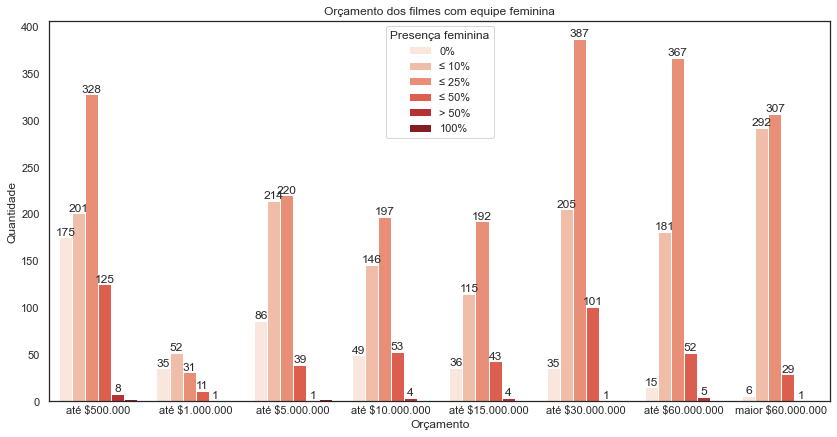

In [142]:
fig = plt.figure(figsize=(14, 7))
plot = sns.countplot(x='Orçamento', hue='Crew', data = crew_new_df, palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.42), cmap_reds(0.58), cmap_reds(0.74), cmap_reds(0.9)])
plt.title("Orçamento dos filmes com equipe feminina")
plt.xlabel("Orçamento")
plt.ylabel("Quantidade")
for i in range (5):
    plot.bar_label(plot.containers[i])
plt.legend(labels = ['0%', '≤ 10%', '≤ 25%', '≤ 50%', '> 50%', '100%'], title = "Presença feminina")
plot.set_xticklabels(["até $500.000", "até $1.000.000", "até $5.000.000", "até $10.000.000", "até $15.000.000", "até $30.000.000", "até $60.000.000", "maior $60.000.000"], ha='center', va='center')
plt.show()

In [89]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = crew_new_df, x = "year", y="Bilheteria",col="Crew", hue = "Crew", palette="bright") 
# g.fig.suptitle("Bilheteria dos filmes com equipe feminina", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Bilheteria")
# plt.show()

In [90]:
# fig = plt.figure(figsize=(14,7))
# plot = sns.countplot(x='Bilheteria', hue='Crew', data = crew_new_df)
# plt.title("Bilheteria dos filmes com equipe feminina", fontsize=15)
# plt.xlabel("Bilheteria dos filmes", fontsize=11)
# plt.ylabel("Quantidade de filmes", fontsize=11)
# for i in range (5):
#     plot.bar_label(plot.containers[i])
# plt.legend(labels = ['0%', '<=10%', '<=25%', '<=50%', '>50%', '100%'], title = "Presença feminina", fontsize = '11', title_fontsize = "11")
# plot.set(xticklabels=[])
# plt.text(0,-20, "até $500.000", ha='center')
# plt.text(1,-20, "até $1.000.000", ha='center')
# plt.text(2,-20, "até $5.000.000", ha='center')
# plt.text(3,-20, "até $10.000.000", ha='center')
# plt.text(4,-20, "até $15.000.000", ha='center')
# plt.text(5,-20, "até $30.000.000", ha='center')
# plt.text(6,-20, "até $60.000.000", ha='center')
# plt.text(7,-20, "maior $60.000.000", ha='center')
# plt.show()

In [135]:
cast_new_df = cast_df.loc[data['budget' and 'revenue'] > 0].copy()

for index, row in cast_new_df.iterrows():
    orçamento = 0
    if row['budget'] <= 500000:
        orçamento += 1
    if row['budget'] <= 1000000 and row['budget'] > 500000:
        orçamento += 2
    if row['budget'] <= 5000000 and row['budget'] > 1000000:
        orçamento += 3
    if row['budget'] <= 10000000 and row['budget'] > 5000000:
        orçamento += 4
    if row['budget'] <= 15000000 and row['budget'] > 10000000:
        orçamento += 5
    if row['budget'] <= 30000000 and row['budget'] > 15000000:
        orçamento += 6
    if row['budget'] <= 60000000 and row['budget'] > 30000000:
        orçamento += 7
    if row['budget'] > 60000000:
        orçamento += 8
    cast_new_df.loc[index, 'Orçamento'] = orçamento
    
cast_new_df['Bilheteria'] = pd.NA

for index, row in cast_new_df.iterrows():
    bilheteria = 0
    if row['revenue'] <= 500000:
        bilheteria += 1
    if row['revenue'] <= 1000000 and row['revenue'] > 500000:
        bilheteria += 2
    if row['revenue'] <= 5000000 and row['revenue'] > 1000000:
        bilheteria += 3
    if row['revenue'] <= 10000000 and row['revenue'] > 5000000:
        bilheteria += 4
    if row['revenue'] <= 15000000 and row['revenue'] > 10000000:
        bilheteria += 5
    if row['revenue'] <= 30000000 and row['revenue'] > 15000000:
        bilheteria += 6
    if row['revenue'] <= 60000000 and row['revenue'] > 30000000:
        bilheteria += 7
    if row['revenue'] > 60000000:
        bilheteria += 8
    cast_new_df.loc[index, 'Bilheteria'] = bilheteria

In [91]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = cast_new_df, x = "year", y="Orçamento",col="Cast", hue = "Cast", palette="bright") 
# g.fig.suptitle("Orçamento dos filmes com elenco feminino", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Orçamento")
# plt.show()

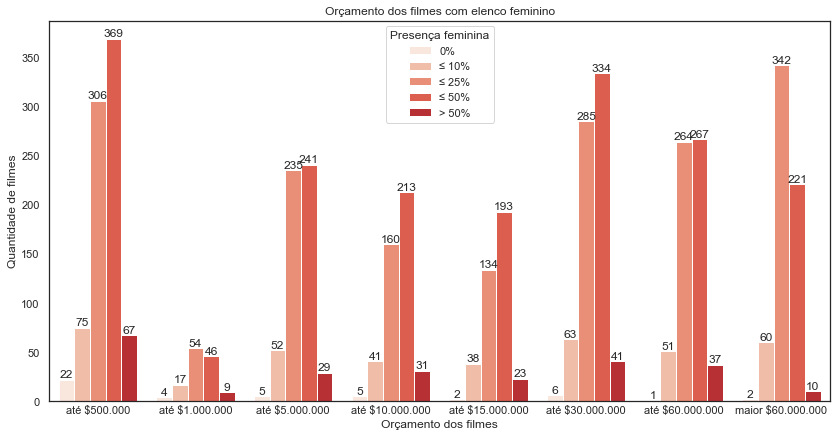

In [148]:
fig = plt.figure(figsize=(14, 7))
plot = sns.countplot(x='Orçamento', hue='Cast', data = cast_new_df, palette=[cmap_reds(0.1), cmap_reds(0.26), cmap_reds(0.42), cmap_reds(0.58), cmap_reds(0.74), cmap_reds(0.9)])
plt.title("Orçamento dos filmes com elenco feminino")
plt.xlabel("Orçamento dos filmes")
plt.ylabel("Quantidade de filmes")
for i in range(5):
    plot.bar_label(plot.containers[i])
plt.legend(labels = ['0%', '≤ 10%', '≤ 25%', '≤ 50%', '> 50%', '100%'], title = "Presença feminina")
plot.set_xticklabels(["até $500.000", "até $1.000.000", "até $5.000.000", "até $10.000.000", "até $15.000.000", "até $30.000.000", "até $60.000.000", "maior $60.000.000"], ha='center', va='center')
plt.show()

In [92]:
# sns.set( rc = {'figure.figsize': (120, 120), 'axes.labelsize': 15}) 
# g = sns.relplot(data = cast_new_df, x = "year", y="Bilheteria",col="Cast", hue = "Cast", palette="bright") 
# g.fig.suptitle("Bilheteria dos filmes com elenco feminino", fontsize = 'x-large', fontweight = 'bold') 
# g.fig.subplots_adjust(top = 0.85) 
# g.set_axis_labels("Anos" , "Bilheteria")
# plt.show()

In [93]:
# fig = plt.figure(figsize=(14,7))
# plot = sns.countplot(x='Bilheteria', hue='Cast', data = cast_new_df)
# plt.title("Bilheteria dos filmes com elenco feminino", fontsize=15)
# plt.xlabel("Bilheteria dos filmes", fontsize=11)
# plt.ylabel("Quantidade de filmes", fontsize=11)
# for i in range (5):
#     plot.bar_label(plot.containers[i])
# plt.legend(labels = ['0%', '<=10%', '<=25%', '<=50%', '>50%', '100%'], title = "Presença feminina", fontsize = '11', title_fontsize = "11")
# plot.set(xticklabels=[])
# plt.text(0,-20, "até $500.000", ha='center')
# plt.text(1,-20, "até $1.000.000", ha='center')
# plt.text(2,-20, "até $5.000.000", ha='center')
# plt.text(3,-20, "até $10.000.000", ha='center')
# plt.text(4,-20, "até $15.000.000", ha='center')
# plt.text(5,-20, "até $30.000.000", ha='center')
# plt.text(6,-20, "até $60.000.000", ha='center')
# plt.text(7,-20, "maior $60.000.000", ha='center')
# plt.show()